In [ ]:
# !pip install kaggle
# https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

In [ ]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13999914479309758755, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15080862412789828063
 physical_device_desc: "device: XLA_CPU device"]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/"

In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle datasets download -d drgfreeman/rockpaperscissors

In [ ]:
# !ls

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/My Drive/Colab Notebooks/rockpaperscissors.zip', 'r')
zip_ref.extractall('files')
zip_ref.close()

In [ ]:
import shutil

shutil.rmtree('/content/files/rockpaperscissors/rps-cv-images', ignore_errors=True)

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_path = '/content/files/rockpaperscissors/'
train_paper_dir = os.path.join(data_path + 'paper')
train_rock_dir = os.path.join(data_path + 'rock')
train_scissors_dir = os.path.join(data_path + 'scissors')

In [ ]:
class callBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('loss') <= 0.15):
            print()
            print("Training di stop karena sudah mencapai sekitar 95%")
            self.model.stop_training = True
callbacks = callBack()

In [ ]:
_datagen = ImageDataGenerator(
    rescale=1./255,      
    horizontal_flip=True,
    width_shift_range=.2,
    height_shift_range=.2,
    vertical_flip = True,
    brightness_range=[0.5,1.5],
    validation_split = 0.2
)  

train_generator = _datagen.flow_from_directory(
    data_path,
    target_size=(200, 300),
    batch_size=128,
    class_mode='categorical',
    subset='training'
)

validation_generator = _datagen.flow_from_directory(
    data_path,
    target_size=(200, 300),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 300, 3)),\
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),

    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(loss='kullback_leibler_divergence',
              optimizer='Nadam',
              metrics=['accuracy']
              )

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 198, 298, 16)      448       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 99, 149, 16)       0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 99, 149, 16)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 97, 147, 32)       4640      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 48, 73, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 48, 73, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 46, 71, 32)       

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples / train_generator.batch_size - 1,
    epochs=15,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples / validation_generator.batch_size - 1,
    callbacks=[callbacks],
)

print(history.epoch, history.history['accuracy'][-1])

Epoch 1/15
13/12 [==============================] - 111s 9s/step - loss: 1.1976 - accuracy: 0.3432 - val_loss: 1.0975 - val_accuracy: 0.3413
Epoch 2/15
13/12 [==============================] - 112s 9s/step - loss: 1.0793 - accuracy: 0.4048 - val_loss: 1.0798 - val_accuracy: 0.5481
Epoch 3/15
13/12 [==============================] - 113s 9s/step - loss: 1.0731 - accuracy: 0.4307 - val_loss: 1.0489 - val_accuracy: 0.6250
Epoch 4/15
13/12 [==============================] - 111s 9s/step - loss: 0.9541 - accuracy: 0.5779 - val_loss: 1.0095 - val_accuracy: 0.4159
Epoch 5/15
13/12 [==============================] - 110s 8s/step - loss: 1.3081 - accuracy: 0.4707 - val_loss: 1.0581 - val_accuracy: 0.5481
Epoch 6/15
13/12 [==============================] - 112s 9s/step - loss: 0.9402 - accuracy: 0.6262 - val_loss: 0.8579 - val_accuracy: 0.7428
Epoch 7/15
13/12 [==============================] - 112s 9s/step - loss: 0.7143 - accuracy: 0.7079 - val_loss: 0.7338 - val_accuracy: 0.6442
Epoch 8/15
13

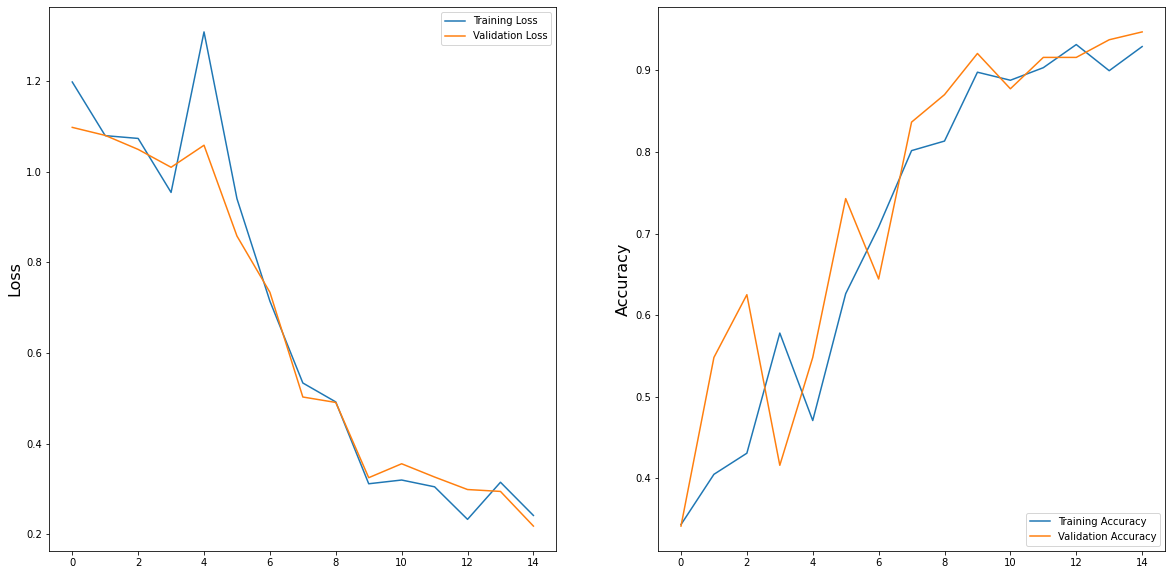

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/model.h5')

Saving ubb6xwgONJP3xBbv.png to ubb6xwgONJP3xBbv.png
ubb6xwgONJP3xBbv.png
rock


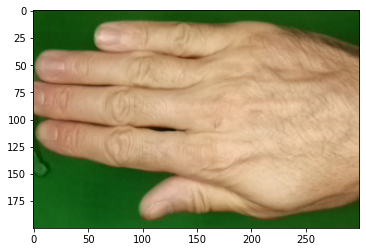

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if np.argmax(classes, axis=1)==0:
    print('rock')
  elif np.argmax(classes, axis=1)==1:
    print('paper')
  else:
    print('scissor')

In [ ]:
import sklearn.metrics 
from sklearn.metrics import classification_report, confusion_matrix

test_generator = _datagen.flow_from_directory(
    directory=data_path,
    target_size=(200, 300),
    batch_size=128,
    class_mode="categorical",
    shuffle=False
)
val_steps=test_generator.n//test_generator.batch_size+1

Y_pred = model.predict_generator(test_generator, test_generator.n // 
128+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

Found 2188 images belonging to 3 classes.
Instructions for updating:
Please use Model.predict, which supports generators.
Confusion Matrix
[[649  49  14]
 [ 41 685   0]
 [ 13   2 735]]
